# Failure to be Always Analytic with the Space-time Derivative Operator

Applying a space-time derivative operator to a space-time function appears simple even though there are many details.

$$\left(\frac{\partial}{\partial t}, \vec{\nabla}\right)(f, \vec{F}) = \left(\frac{\partial f}{\partial t} - \nabla \cdot F, \frac{\partial \vec{F}}{\partial t} + \vec{\nabla} f + \vec{\nabla} \times \vec{F}\right)$$

There are 16 terms in all. A function will be created that does just that. Yet we have to make sure that simple functions like $q^2$, $q^3$, and $q^4$ all work nicely as they do in complex analysis.

Load the libraries.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import unittest

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
from Qs import *

from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))

To derive the Maxwell equations, one also needs to work with conjugates of the differential operator. One also needs to be able to write the differential operator on the right as well as the left, which flips the signs of the terms involved with the cross product. The function $\rm{Dq\_try\_1}()$ should be able to do this.

In [2]:
def Dq_try_1(q_1: Q, vars: List[sp.Symbol], these_vars: List[sp.Symbol] = None, conj: bool = False, conj_type: int=0, reverse: bool=False) -> Q:
    """
    Calculate the quaternion derivative composed of 16 terms. The conjugation applies to the differential operator. The reverse flag will flip the cross product terms.
    
    Args:
        q_1         A symbolic expression that returns a space-time number expression.
        vars        A complete list of what 4 symbols are being used.
        these_vars  A (possibly shorter) list of symbols to use to take a derivative.
        conj        If one wants to take a conjugate of the differential operator, set this option.
        conj_type   An integer for which term is positive, 0 the default for the standard conjugate.
        
    Return:
        Q     The space-time derivative
    """
    
    # Check for errors.
    if len(vars) != 4:
        print("Oops: needs to be given 4 symbols. Try again.")
        return 0
    
    if not q_1.is_symbolic():
        print("Oops, the function needs to be symbolic.")
        
    if these_vars is None:
        these_vars = vars
        
    # Use the_D_signs to apply different conjugates to the differential operator D.
    D_signs = [1, 1, 1, 1]
    
    if conj:
        if conj_type == 0:
            D_signs = [1, -1, -1, -1]
        if conj_type == 1:
            D_signs = [-1, 1, -1, -1]
        if conj_type == 2:
            D_signs = [-1, -1, 1, -1]
        if conj_type == 3:
            D_signs = [-1, -1, -1, 1]
    
    the_16 = []
    
    for sign, var in enumerate(vars):
        if var in these_vars:
            the_16.append(sp.diff(D_signs[sign] * q_1.t, var))
            the_16.append(sp.diff(D_signs[sign] * q_1.x, var))
            the_16.append(sp.diff(D_signs[sign] * q_1.y, var))
            the_16.append(sp.diff(D_signs[sign] * q_1.z, var))
            
        else:
            for _ in range(4):
                the_16.append(0)

    flip = -1 if reverse else 1

    first_term =  the_16[0] - (the_16[5] + the_16[10] + the_16[15])
    second_term = the_16[1] + the_16[4] + flip * the_16[14] - flip * the_16[11]
    third_term =  the_16[2] + the_16[8] + flip * the_16[13] - flip * the_16[7]
    forth_term =  the_16[3] + the_16[12] + flip * the_16[6] - flip * the_16[9]
    
    return Q([first_term.simplify(), second_term.simplify(), third_term.simplify(), forth_term.simplify()])

Test that the function works on a complex-valued square funciton:

In [3]:
t, x, y, z = sp.symbols("t x y z")
q_tx = Q([t, x, 0, 0])
q_tx_2 = product(q_tx, q_tx)
q_tx_2.print_state("q_tx²")
print()
D_tx_2_dt = Dq_try_1(q_tx_2, [t, x, y, z], [t])
D_tx_2_dt.print_state("D_tx_2_dt")
D_tx_2_dx = Dq_try_1(q_tx_2, [t, x, y, z], [x])
D_tx_2_dx.print_state("D_tx_2_dx")
D_tx_2_dtdx = Dq_try_1(q_tx_2, [t, x, y, z], [t, x])
D_tx_2_dtdx.print_state("D_tx_2_dtdx")


q_tx²
(t**2 - x**2, 2*t*x, 0, 0) 


D_tx_2_dt
(2*t, 2*x, 0, 0) 

D_tx_2_dx
(-2*t, -2*x, 0, 0) 

D_tx_2_dtdx
(0, 0, 0, 0) 



Why is the derivative equal to zero? The square of a complex number is an analytic function. The space-time number derivative implements the Cauchy-Reimann equations:

$$(f, F_x) = (t^2 - x^2, 2 t x)$$

$$\frac{\partial f}{\partial t} -\frac{\partial F_x}{\partial x} = 0$$

$$\frac{\partial F_x}{\partial t} + \frac{\partial f}{\partial x} = 0$$

For this particular choice of function, the answer should be zero as it is.

What space-time numbers do is introduce 2 more imaginaries and no more scalars. This process necessarily adds some kinds of complications that need to be managed. See what happens if one takes the very same function, but makes it depend on two spatial dimensions

In [4]:
q_txy = Q([t, x, y, 0])
q_txy_2 = product(q_txy, q_txy)
q_txy_2.print_state("q_txy²")
D_txy_2_dt = Dq_try_1(q_txy_2, [t, x, y, z], [t])
D_txy_2_dt.print_state("D_txy²_dt")
D_txy_2_dx = Dq_try_1(q_txy_2, [t, x, y, z], [x])
D_txy_2_dx.print_state("D_txy²_dx")
D_txy_2_dx = Dq_try_1(q_txy_2, [t, x, y, z], [y])
D_txy_2_dx.print_state("D_txy²_dy")
D_txy_2_dtdxdy = Dq_try_1(q_txy_2, [t, x, y, z], [t, x, y])
D_txy_2_dtdxdy.print_state("D_txy²_dtdx")

q_txy²
(t**2 - x**2 - y**2, 2*t*x, 2*t*y, 0) 

D_txy²_dt
(2*t, 2*x, 2*y, 0) 

D_txy²_dx
(-2*t, -2*x, 0, 0) 

D_txy²_dy
(-2*t, 0, -2*y, 0) 

D_txy²_dtdx
(-2*t, 0, 0, 0) 



Going from one imaginary to two appears to make the function become What happens here is that the exact same scalar is added twice, the -2\*t for the two imaginaries. The function goes from divergence-free to one with a divergence. To my eye, it looks like the scalar gets double counted. Think about a function $f = (t, x, \epsilon y, 0)^2$ where epsilon is a tiny number. It does not appear reasonable that the scalar value should change from divergent-free (zero) just because it points in a slightly different direction. One would expect the same issue to apply to three dimensions, but this time in triplicate.

Try a form where there is but one unique contribution to the divergence from the three imaginary derivatives.

In [5]:
def Dq_try_2(q_1: Q, vars: List[sp.Symbol], these_vars: List[sp.Symbol] = None, conj: bool = False, conj_type: int=0, reverse: bool=False) -> Q:
    """
    Calculate the quaternion derivative composed of 16 terms. The conjugation applies to the differential operator. The reverse flag will flip the cross product terms.
    
    Args:
        q_1         A symbolic expression that returns a space-time number expression.
        vars        A complete list of what 4 symbols are being used.
        these_vars  A (possibly shorter) list of symbols to use to take a derivative.
        conj        If one wants to take a conjugate of the differential operator, set this option.
        conj_type   An integer for which term is positive, 0 the default for the standard conjugate.
        
    Return:
        Q     The space-time derivative
    """
    
    # Check for errors.
    if len(vars) != 4:
        print("Oops: needs to be given 4 symbols. Try again.")
        return 0
    
    if not q_1.is_symbolic():
        print("Oops, the function needs to be symbolic.")
        
    if these_vars is None:
        these_vars = vars
        
    # Use the_D_signs to apply different conjugates to the differential operator D.
    D_signs = [1, 1, 1, 1]
    
    if conj:
        if conj_type == 0:
            D_signs = [1, -1, -1, -1]
        if conj_type == 1:
            D_signs = [-1, 1, -1, -1]
        if conj_type == 2:
            D_signs = [-1, -1, 1, -1]
        if conj_type == 3:
            D_signs = [-1, -1, -1, 1]
    
    the_16 = []
    
    for sign, var in enumerate(vars):
        if var in these_vars:
            the_16.append(sp.diff(D_signs[sign] * q_1.t, var))
            the_16.append(sp.diff(D_signs[sign] * q_1.x, var))
            the_16.append(sp.diff(D_signs[sign] * q_1.y, var))
            the_16.append(sp.diff(D_signs[sign] * q_1.z, var))
            
        else:
            for _ in range(4):
                the_16.append(0)

    flip = -1 if reverse else 1

    # Use a Python set() that only accepts unique values.
    non_zero_div = set()
    if the_16[5] != 0:
        non_zero_div.add(sp.simplify(the_16[5]))
        
    if the_16[10] != 0:
        non_zero_div.add(sp.simplify(the_16[10]))
        
    if the_16[15] != 0:
        non_zero_div.add(sp.simplify(the_16[15]))
    
    if len(non_zero_div) == 0:
        div = 0
        
    elif len(non_zero_div) == 1:
        div = non_zero_div.pop()
        
    elif len(non_zero_div) == 2:
        div = non_zero_div.pop() + non_zero_div.pop()
        div.simplify()
        
    else:
        for non_zero in non_zero_div:
            print(f"non_zero: {non_zero}")
        div = non_zero_div.pop() + non_zero_div.pop() + non_zero_div.pop()
        div.simplify()
        
    first_term =  the_16[0] - div
    second_term = the_16[1] + the_16[4] + flip * the_16[14] - flip * the_16[11]
    third_term =  the_16[2] + the_16[8] + flip * the_16[13] - flip * the_16[7]
    forth_term =  the_16[3] + the_16[12] + flip * the_16[6] - flip * the_16[9]
    
    return Q([first_term.simplify(), second_term.simplify(), third_term.simplify(), forth_term.simplify()])

In [6]:
q_txy = Q([t, x, y, 0])
q_txy_2 = product(q_txy, q_txy)
q_txy_2.print_state("q_txy²")
D_txy_2_dt = Dq_try_2(q_txy_2, [t, x, y, z], [t])
D_txy_2_dt.print_state("D_txy²_dt")
D_txy_2_dx = Dq_try_2(q_txy_2, [t, x, y, z], [x])
D_txy_2_dx.print_state("D_txy²_dx")
D_txy_2_dx = Dq_try_2(q_txy_2, [t, x, y, z], [y])
D_txy_2_dx.print_state("D_txy²_dy")
D_txy_2_dtdxdy = Dq_try_2(q_txy_2, [t, x, y, z], [t, x, y])
D_txy_2_dtdxdy.print_state("D_txy²_dtdx")

q_txy²
(t**2 - x**2 - y**2, 2*t*x, 2*t*y, 0) 

D_txy²_dt
(2*t, 2*x, 2*y, 0) 

D_txy²_dx
(-2*t, -2*x, 0, 0) 

D_txy²_dy
(-2*t, 0, -2*y, 0) 

D_txy²_dtdx
(0, 0, 0, 0) 



Nice. Now try with three imaginaries:

In [7]:
q_txyz = Q([t, x, y, z])
q_txyz_2 = product(q_txyz, q_txyz)
q_txyz_2.print_state("q_txyz²")
D_txyz_2_dt = Dq_try_2(q_txyz_2, [t, x, y, z], [t])
D_txyz_2_dt.print_state("D_txyz²_dt")
D_txyz_2_dx = Dq_try_2(q_txyz_2, [t, x, y, z], [x])
D_txyz_2_dx.print_state("D_txyz²_dx")
D_txyz_2_dy = Dq_try_2(q_txyz_2, [t, x, y, z], [y])
D_txyz_2_dy.print_state("D_txyz²_dy")
D_txyz_2_dz = Dq_try_2(q_txyz_2, [t, x, y, z], [z])
D_txyz_2_dz.print_state("D_txyz²_dz")
D_txyz_2_dtdxdydz = Dq_try_2(q_txyz_2, [t, x, y, z])
D_txyz_2_dtdxdydz.print_state("D_txyx²_dtdxdydz")

q_txyz²
(t**2 - x**2 - y**2 - z**2, 2*t*x, 2*t*y, 2*t*z) 

D_txyz²_dt
(2*t, 2*x, 2*y, 2*z) 

D_txyz²_dx
(-2*t, -2*x, 0, 0) 

D_txyz²_dy
(-2*t, 0, -2*y, 0) 

D_txyz²_dz
(-2*t, 0, 0, -2*z) 

D_txyx²_dtdxdydz
(0, 0, 0, 0) 



See if a cube works.

In [8]:
q_txyz = Q([t, x, y, z])
q_txyz_3 = product(product(q_txyz, q_txyz), q_txyz)
q_txyz_3.print_state("q_txyz³")
D_txyz_3_dt = Dq_try_2(q_txyz_3, [t, x, y, z], [t])
D_txyz_3_dt.print_state("D_txyz³_dt")
D_txyz_3_dx = Dq_try_2(q_txyz_3, [t, x, y, z], [x])
D_txyz_3_dx.print_state("D_txyz³_dx")
D_txyz_3_dy = Dq_try_2(q_txyz_3, [t, x, y, z], [y])
D_txyz_3_dy.print_state("D_txyz³_dy")
D_txyz_3_dz = Dq_try_2(q_txyz_3, [t, x, y, z], [z])
D_txyz_3_dz.print_state("D_txyz³_dz")
D_txyz_3_dtdxdydz = Dq_try_2(q_txyz_3, [t, x, y, z])
D_txyz_3_dtdxdydz.print_state("D_txyx³_dtdxdydz")

q_txyz³
(-2*t*x**2 - 2*t*y**2 - 2*t*z**2 + t*(t**2 - x**2 - y**2 - z**2), 2*t**2*x + x*(t**2 - x**2 - y**2 - z**2), 2*t**2*y + y*(t**2 - x**2 - y**2 - z**2), 2*t**2*z + z*(t**2 - x**2 - y**2 - z**2)) 

D_txyz³_dt
(3*t**2 - 3*x**2 - 3*y**2 - 3*z**2, 6*t*x, 6*t*y, 6*t*z) 

D_txyz³_dx
(-3*t**2 + 3*x**2 + y**2 + z**2, -6*t*x, 2*x*z, -2*x*y) 

D_txyz³_dy
(-3*t**2 + x**2 + 3*y**2 + z**2, 2*y*z, -6*t*y, 2*x*y) 

D_txyz³_dz
(-3*t**2 + x**2 + y**2 + 3*z**2, -2*y*z, -2*x*z, -6*t*z) 

non_zero: 3*t**2 - x**2 - y**2 - 3*z**2
non_zero: 3*t**2 - 3*x**2 - y**2 - z**2
non_zero: 3*t**2 - x**2 - 3*y**2 - z**2
D_txyx³_dtdxdydz
(-6*t**2 + 2*x**2 + 2*y**2 + 2*z**2, 0, 0, 0) 



This looks like a failure. The $t^2$ terms are following the same pattern: there is a triplicate going on. The terms with the $x^2$, $y^2$, and $z^2$ are $\frac{5}{3}$ too big. The extra terms come from mixed terms terms. Perhaps there is an elegant way to do it, or this could just be a message: don't try to do it.

What does it take to find the "balancer" factors for the scalar and the 3-vectors?

In [9]:
zero_t = {t: 0}
zero_xyz = {x: 0, y: 0, z: 0}
dt_v = D_txyz_3_dt.subs(zero_t)
dt_s = D_txyz_3_dt.subs(zero_xyz)

D_txyz_3_dxdydz = add(add(D_txyz_3_dx, D_txyz_3_dy), D_txyz_3_dz)
dR_v = D_txyz_3_dxdydz.subs(zero_t)
dR_s = D_txyz_3_dxdydz.subs(zero_xyz)
n = sp.symbols("n")
print(sp.solve(dt_s.t + n * dR_s.t, n)[0])
print(sp.solve(dt_v.t + n * dR_v.t, n)[0])

1/3
3/5


So there is a path to these values. It is too much of a hack to include in code.

Now test to find something that _doesn't work_, the conjugate:

In [10]:
q_tx_c = conj(Q([t, x, 0, 0]))
q_tx_c_2 = product(q_tx_c, q_tx_c)
q_tx_c_2.print_state("q_tx*²")
D_tx_c_2_dt = Dq_try_1(q_tx_c_2, [t, x, y, z], [t])
D_tx_c_2_dt.print_state("D_tx*²_dt")
D_tx_c_2_dx = Dq_try_1(q_tx_c_2, [t, x, y, z], [x])
D_tx_c_2_dx.print_state("D_tx*²_dx")
D_tx_c_2_dtdx = Dq_try_1(q_tx_c_2, [t, x, y, z], [t, x])
D_tx_c_2_dtdx.print_state("D_tx*²_dtdx")

q_tx*²
(t**2 - x**2, -2*t*x, 0, 0) 

D_tx*²_dt
(2*t, -2*x, 0, 0) 

D_tx*²_dx
(2*t, -2*x, 0, 0) 

D_tx*²_dtdx
(4*t, -4*x, 0, 0) 



Neither of the Cauchy-Riemann equations hold. The differential operator and function point in different directions.

This can be fixed by taking the conjugate of the differential, so both are now aligned:

In [11]:
q_tx_c = conj(Q([t, x, 0, 0]))
q_tx_c_2 = product(q_tx_c, q_tx_c)
q_tx_c_2.print_state("q_tx*²")
D_c_tx_c_2_dt = Dq_try_1(q_tx_c_2, [t, x, y, z], [t], conj=True)
D_c_tx_c_2_dt.print_state("D*_tx*²_dt")
D_c_tx_c_2_dx = Dq_try_1(q_tx_c_2, [t, x, y, z], [x], conj=True)
D_c_tx_c_2_dx.print_state("D*_tx*²_dx")
D_c_tx_c_2_dtdx = Dq_try_1(q_tx_c_2, [t, x, y, z], [t, x], conj=True)
D_c_tx_c_2_dtdx.print_state("D*_tx*²_dtdx")

q_tx*²
(t**2 - x**2, -2*t*x, 0, 0) 

D*_tx*²_dt
(2*t, -2*x, 0, 0) 

D*_tx*²_dx
(-2*t, 2*x, 0, 0) 

D*_tx*²_dtdx
(0, 0, 0, 0) 



The calling card of a conservative force, one that uses no energy, is that the divergence is zero. Now the interpretation is that for more complicated functions, changes in time (implying energy) must be involved. 

sin(t, x)


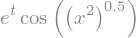

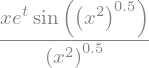

d_exp_tx'


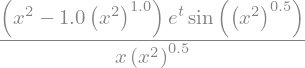

In [12]:
exp_tx = exp(Q([t, x, 0, 0]))
exp_tx.display_q("sin(t, x)")

d_exp_tx = Dq_try_2(exp_tx, [t, x, y, z], [t, x])
d_exp_tx.simple_q().display_q("d_exp_tx'")

Oops, this should be zero. This is a bug involving floats and integers.

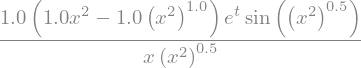

In [13]:
d_exp_tx.x.evalf()
d_exp_tx.x.expand()
d_exp_tx.x.factor()

It is unclear how to try to fix this bug. Add it to the backlog.

## Takehome message from the exercise

A simple, direct definition of a space-time operator on a space-time function will yield expected analytic functions for complex numbers. When pushed from one imaginary dimension to several, the divergence-free quality is lost. Realize this happens in the tangent space of space-time, the house of momentum-energy above each point in space-time.